# MODELO DE EJECUCIÓN 

## IMPORTAR LAS LIBRERIAS

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Calidad de datos
from janitor import clean_names
from sklearn.preprocessing import LabelEncoder

#Modelos
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Métricas de evaluación
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

#Crear Pipeline
from sklearn.pipeline import make_pipeline

import cloudpickle

## CARGAR LOS DATOS

In [2]:
df = pd.read_csv('../../02_Datos/02_Validacion/validacion.csv')
df.head()

,Unnamed: 0,WIFI1,WIFI2,WIFI3,WIFI4,WIFI5,WIFI6,WIFI7,room
0,1,-68,-57,-61,-65,-71,-85,-85,1
1,6,-65,-61,-65,-67,-69,-87,-84,1
2,7,-61,-63,-58,-66,-74,-87,-82,1
3,12,-63,-57,-61,-65,-73,-84,-84,1
4,14,-61,-59,-65,-63,-74,-89,-87,1


## ESTRUCTURA DEL DATASETS

### CALIDAD DE DATOS

In [3]:
df = clean_names(df)
df = df.drop(columns= 'unnamed_0', axis=1)
df.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-68,-57,-61,-65,-71,-85,-85,1
1,-65,-61,-65,-67,-69,-87,-84,1
2,-61,-63,-58,-66,-74,-87,-82,1
3,-63,-57,-61,-65,-73,-84,-84,1
4,-61,-59,-65,-63,-74,-89,-87,1


In [4]:
df.shape

(600, 8)

### SEPARAR PREDICTORAS Y TARGET

In [5]:
x = df.drop(columns = 'room').copy()
y = df.room.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_xgm = le.fit_transform(y)

## MODELIZAR CON LOS PIPES DE EJECUCIÓN

### CARGAMOS PIPE DE EJECUCIÓN

#### Modelo Clasificación

- V1 --> ExtraTreesClassifier
- V2 --> ExtraTreesClassifier parametrizado
- V4 --> XGBClassifier parametrizado

In [6]:
modelov1 = pd.read_pickle('../../04_Modelos/pipe_ejecucion_v1.pickle')
modelov2 = pd.read_pickle('../../04_Modelos/pipe_ejecucion_v2.pickle')
modelov4 = pd.read_pickle('../../04_Modelos/pipe_ejecucion_v4.pickle')

## EVALUAR CON DATASET DE PRUEBA

### PREDECIR SOBRE DATOS DE PRUEBA

In [7]:
predv1 = modelov1.predict(x)
predv2 = modelov2.predict(x)
predv4 = modelov4.predict(x)

### EVALUAR SOMBRE DATOS DE PRUEBA

In [8]:
def evaluar_clasificacion(pred, y, modelo = 'otro'):

    if modelo == 'otro':
        v_accuracy = accuracy_score(y, pred)
        v_report = classification_report(y, pred)

        print(f"Accuracy: {v_accuracy}")
        print(f"Classification Report:\n{v_report}")
    else:

        le = LabelEncoder()
        y = le.fit_transform(y)
        v_accuracy = accuracy_score(y, pred)
        v_report = classification_report(y, pred)

        print(f"Accuracy: {v_accuracy}")
        print(f"Classification Report:\n{v_report}")

In [9]:
print('V1 --> ExtraTreesClassifier\n')
evaluar_clasificacion(predv1, y)
print('V2 --> ExtraTreesClassifier parametrizado\n')
evaluar_clasificacion(predv2, y)
print('V4 --> XGBClassifier parametrizado\n')
evaluar_clasificacion(predv4, y, modelo = 'xgb')

V1 --> ExtraTreesClassifier

Accuracy: 0.985
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       148
           2       0.99      0.97      0.98       165
           3       0.97      0.97      0.97       150
           4       0.99      1.00      1.00       137

    accuracy                           0.98       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.98      0.98       600

V2 --> ExtraTreesClassifier parametrizado

Accuracy: 0.9866666666666667
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       148
           2       0.99      0.97      0.98       165
           3       0.97      0.98      0.97       150
           4       0.99      1.00      0.99       137

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.9

## REPORTING DEL MODELO

Matrix de Confusión MultiClass

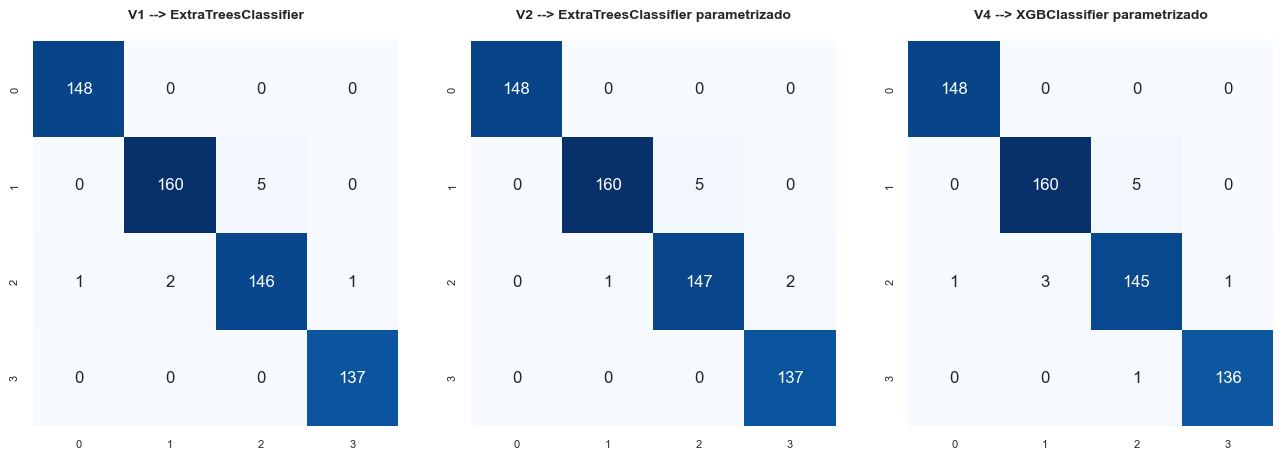

In [47]:
# Calcular la matriz de confusión

title = ['V1 --> ExtraTreesClassifier\n', 'V2 --> ExtraTreesClassifier parametrizado\n', 'V4 --> XGBClassifier parametrizado\n' ]

cmv1 = confusion_matrix(y, predv1)
cmv2 = confusion_matrix(y, predv2)

le = LabelEncoder()
yv4 = le.fit_transform(y)
cmv4 = confusion_matrix(yv4, predv4)

f, ax = plt.subplots(ncols= 3, nrows=1, figsize= (16,5))
ax.flat

sns.heatmap(cmv1, annot=True, cmap="Blues", fmt="d", cbar=False, ax= ax[0])
sns.heatmap(cmv2, annot=True, cmap="Blues", fmt="d", cbar=False, ax= ax[1])
sns.heatmap(cmv4, annot=True, cmap="Blues", fmt="d", cbar=False, ax= ax[2])

for cada, nombre in enumerate(title):
    ax[cada].set_title(nombre, fontsize = 10, fontweight = "bold")
    ax[cada].tick_params(labelsize = 8);



ROC CHART MULTICLASS

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


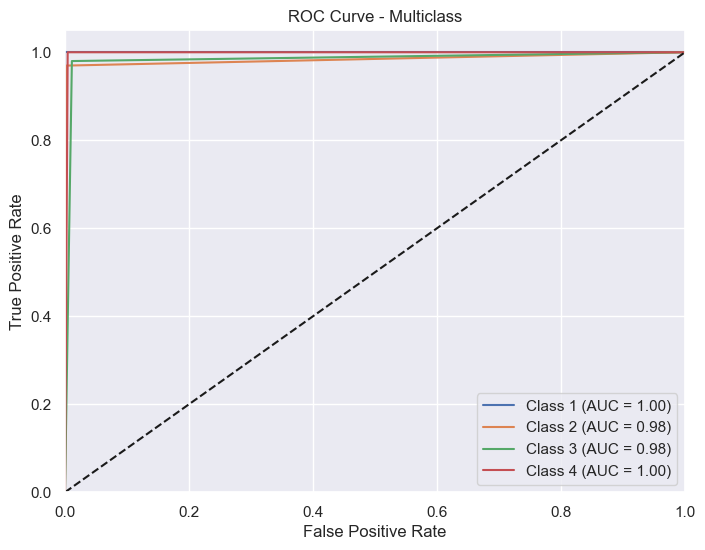

In [57]:
# Binarizar las etiquetas verdaderas y las predicciones para cada clase
n_classes = len(np.unique(y))+1
binarized_val_y = label_binarize(y, classes=np.arange(n_classes))
binarized_pred = label_binarize(predv2, classes=np.arange(n_classes))

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_val_y[:, i], binarized_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotear el gráfico ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(1, n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right");